In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 


# Missing data 

Missing data occours when values are simply absent or containing NaN (not a number) for any feature (column) in a given dataset. This will cause issues with many machine learning algorithms.

## Missing data can negatively impact:

- Data visualization
- Arithmetic computations
- Machine learning algorithms 

## Common methods to deal with missing data:

- Remove rows or columns containing missing data 
- Impute whit mean or median 
- Impute with mode (most frequently occouring feature)
- Impute with forward of backward fill
- Interpolate data between two points

**Note: Domain knowledge is often needed to decide how to fill nulls.**

In [3]:
df = pd.DataFrame(np.random.randn(10, 4), columns = ['A', 'B', 'C', 'D'])
df = df[df > 0]
df

,A,B,C,D
0,0.783505,NaN,0.492246,0.066572
1,NaN,0.065846,NaN,1.114844
2,1.946974,NaN,0.253920,1.637044
3,1.222063,1.007802,NaN,0.228004
4,1.508295,0.300891,NaN,0.279353
5,NaN,0.450513,NaN,2.161345
6,0.206112,NaN,NaN,NaN
7,NaN,0.813084,0.149957,0.069254
8,0.401671,NaN,NaN,NaN
9,1.094984,NaN,0.632635,1.004933


In [41]:
copy = df.copy()
copy.drop(columns='D', inplace=True)
copy

,A,B,C
0,0.783505,NaN,0.492246
1,NaN,0.065846,NaN
2,1.946974,NaN,0.253920
3,1.222063,1.007802,NaN
4,1.508295,0.300891,NaN
5,NaN,0.450513,NaN
6,0.206112,NaN,NaN
7,NaN,0.813084,0.149957
8,0.401671,NaN,NaN
9,1.094984,NaN,0.632635


# dropna 

Removes rows (default), or columns containg null

**Parameters**

- **how** = "any" (default), or "all"
-  **thresh** = set numbers of (non-missing) values a row must contain in order to *not* drop 
-  **subset** only look for NaN in subset of columns (or row)
-  **axis** = "index" (default), or "columns"
  

In [42]:
copy.dropna(axis='columns', subset=2)


,A,C
0,0.783505,0.492246
1,NaN,NaN
2,1.946974,0.253920
3,1.222063,NaN
4,1.508295,NaN
5,NaN,NaN
6,0.206112,NaN
7,NaN,0.149957
8,0.401671,NaN
9,1.094984,0.632635


# fillna 

Fill missing values 

In [51]:
copy = df.copy()
#copy.fillna(444.2) # Fill all NaN in dataframe with value 444
copy["A"].fillna(copy["A"].median(), inplace=True)


# copy["B"].mode()[0] # Mainly for categorical data
copy["B"].ffill(inplace=True)

copy["D"].bfill(inplace=True)

copy["C"].interpolate(inplace=True)
copy



,A,B,C,D
0,0.783505,NaN,0.492246,0.066572
1,1.094984,0.065846,0.373083,1.114844
2,1.946974,0.065846,0.253920,1.637044
3,1.222063,1.007802,0.233128,0.228004
4,1.508295,0.300891,0.212335,0.279353
5,1.094984,0.450513,0.191542,2.161345
6,0.206112,0.450513,0.170750,0.069254
7,1.094984,0.813084,0.149957,0.069254
8,0.401671,0.813084,0.391296,1.004933
9,1.094984,0.813084,0.632635,1.004933


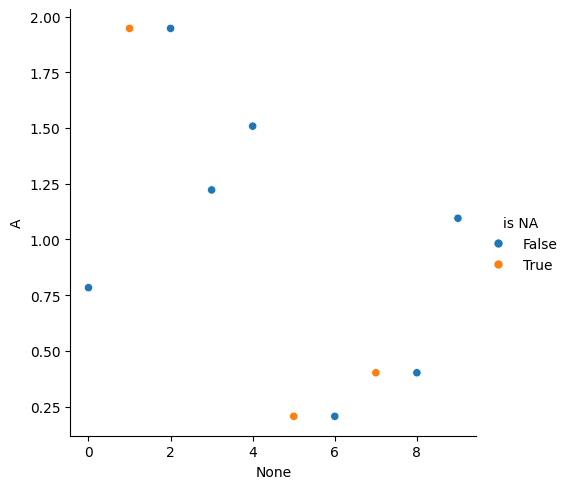

In [56]:
copy = df.copy()
copy['is NA'] = copy['A'].isna()
copy
copy['A'].bfill(inplace=True)
copy
sns.relplot(x=copy.index, y='A', hue='is NA', data=copy)